In [26]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

In [41]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
style = '<style>svg{width:50% !importamt;height:50% !important;}<style>'
HTML(style)

In [35]:
pd.set_option('display.max_columns', None)
titanic_data = pd.read_csv('train.csv')

In [36]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
Y = titanic_data.Survived
X = pd.get_dummies(X)
X = X.fillna({'Age': X.Age.median()})

In [37]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [43]:
clf = tree.DecisionTreeClassifier(criterion='entropy')



In [44]:
clf.fit(X, Y)


DecisionTreeClassifier(criterion='entropy')

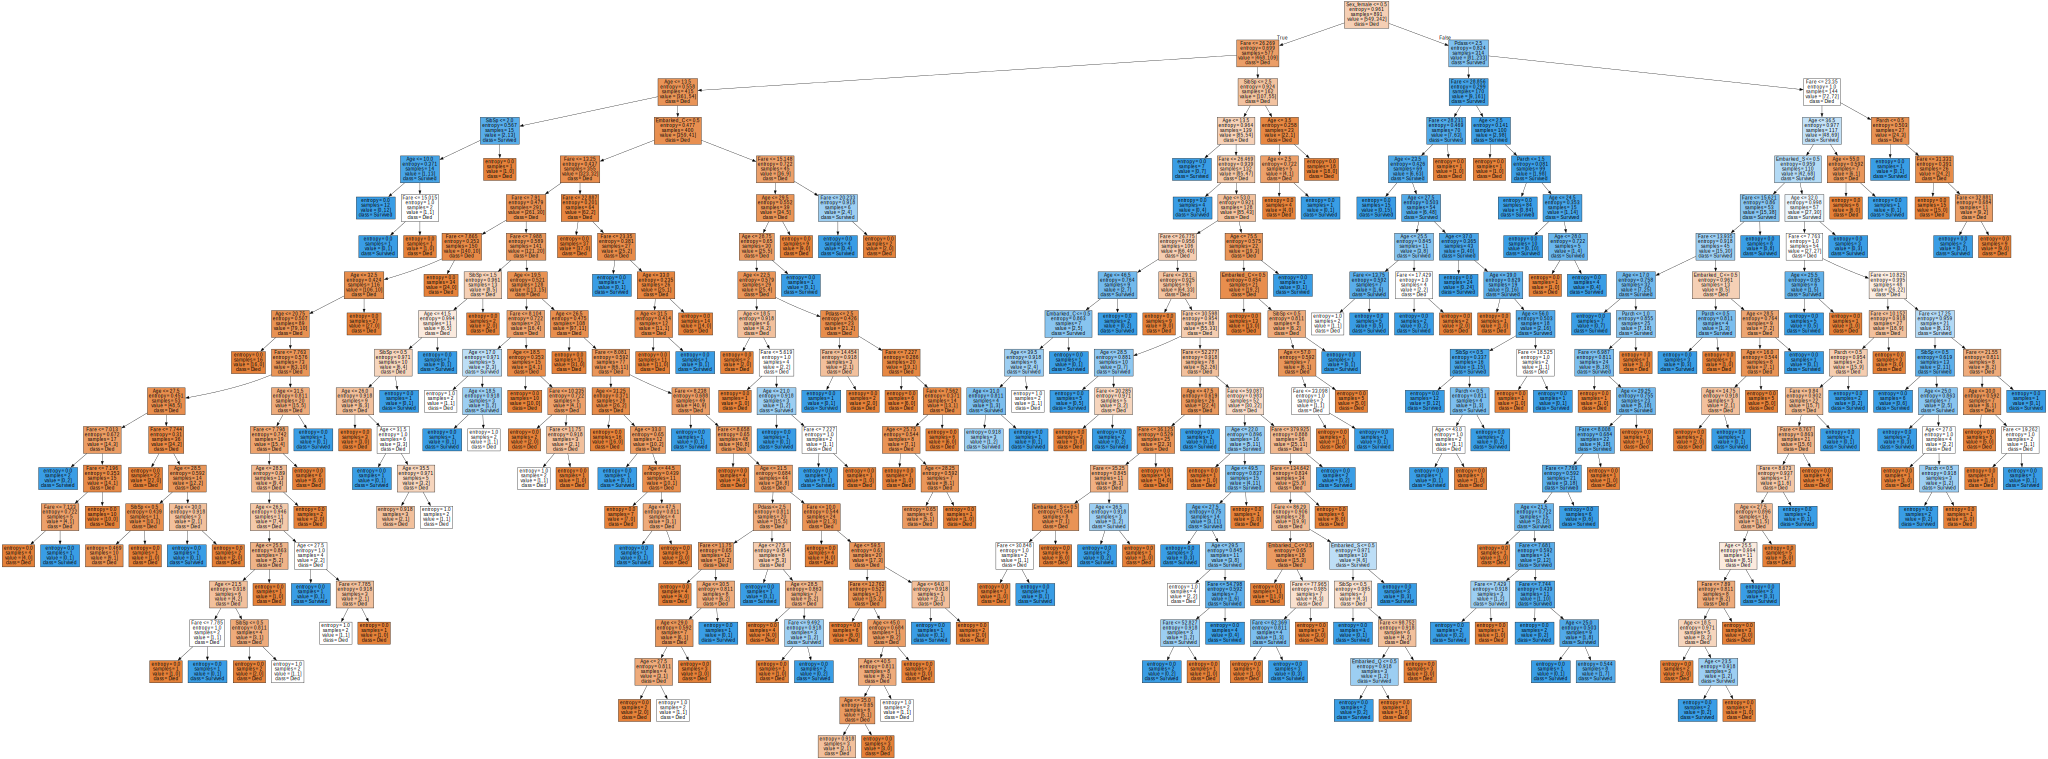

In [42]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X), class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

In [46]:
from sklearn.model_selection import train_test_split


In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)